# Besoin client n°3  

# Partie commune : import des datas

Import des libs

In [144]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [145]:
# import du csv
data = pd.read_csv('csv_final.csv')

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          10980 non-null  float64
 1   Y                          10980 non-null  float64
 2   OBJECTID                   10980 non-null  int64  
 3   created_date               10684 non-null  object 
 4   created_user               10659 non-null  object 
 5   src_geo                    10255 non-null  object 
 6   clc_quartier               10980 non-null  object 
 7   clc_secteur                10980 non-null  object 
 8   id_arbre                   10980 non-null  int64  
 9   haut_tot                   10980 non-null  float64
 10  haut_tronc                 10980 non-null  float64
 11  tronc_diam                 10980 non-null  int64  
 12  fk_arb_etat                10980 non-null  object 
 13  fk_stadedev                10940 non-null  obj

In [147]:
data

,X,Y,OBJECTID,created_date,created_user,src_geo,clc_quartier,clc_secteur,id_arbre,haut_tot,...,villeca,nomfrancais,nomlatin,GlobalID,CreationDate,Creator,EditDate,Editor,feuillage,remarquable
0,49.840500,3.293264,10,2017-02-02,mickael.delaere,orthophoto,quartier du centre-ville,quai gayant,19,6.0,...,ville,querub,querub,{b33346a7-0de2-428e-a48d-4b231368284c},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
1,49.861409,3.273380,21,2017-02-02,mickael.delaere,orthophoto,quartier du vermandois,stade cepy,7,13.0,...,ville,pinnignig,pinnignig,{668fefc7-0667-4ffa-ae55-c82861edfc0b},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,conifère,non
2,49.844513,3.289068,22,2017-02-02,mickael.delaere,orthophoto,quartier du centre-ville,rue villebois mareuil,1,12.0,...,ville,acepse,acepse,{d0017cec-d346-4c95-a043-ad115b267089},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
3,49.861778,3.302387,25,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,square des marronniers,48,16.0,...,ville,acepla,acepla,{9b347790-954e-4e86-ad09-382fc1f32b24},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
4,49.858446,3.304047,26,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,avenue buffon,25,5.0,...,ville,salbab,salbab,{d6af7997-d4b3-405f-8c95-f93c4f41be4a},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,49.848695,3.283505,12020,NaN,NaN,orthophoto,quartier du centre-ville,place edouard branly,2,3.0,...,ville,albjul,albjul,{d411ba30-f054-45a2-af78-c90fc62baa0c},NaN,NaN,NaN,NaN,feuillu,non
10976,49.848682,3.283436,12021,NaN,NaN,orthophoto,quartier du centre-ville,place edouard branly,3,3.0,...,ville,albjulcho,albjulcho,{557e12ce-b2fd-4fbf-98e3-bff5d9f32272},NaN,NaN,NaN,NaN,feuillu,non
10977,49.860413,3.297078,12022,NaN,NaN,orthophoto,quartier de l'europe,rue hertz,78,3.0,...,ville,cedlib,cedlib,{af88d312-7b52-4e1a-81b9-328cdcf8ca16},NaN,NaN,NaN,NaN,conifère,non
10978,49.848009,3.291685,12023,NaN,NaN,orthophoto,quartier du centre-ville,square rue fréreuse,14,3.0,...,ville,fagsyldawgol,fagsyldawgol,{bce4e037-9cdf-4b0e-b12e-5e9031006eba},NaN,NaN,NaN,NaN,feuillu,non


## Random Forest 1 


In [148]:
data["fk_stadedev"].unique()

array(['jeune', 'adulte', 'senescent', 'vieux', nan, ' '], dtype=object)

In [149]:
data.shape

(10980, 37)

In [150]:
# supprimer les lignes avec valeurs manquantes
data.drop(data[pd.isna(data.fk_stadedev)].index, inplace=True)
data.drop(data[data.fk_stadedev == " "].index, inplace=True)


In [151]:
data.shape

(10938, 37)

In [152]:
data

,X,Y,OBJECTID,created_date,created_user,src_geo,clc_quartier,clc_secteur,id_arbre,haut_tot,...,villeca,nomfrancais,nomlatin,GlobalID,CreationDate,Creator,EditDate,Editor,feuillage,remarquable
0,49.840500,3.293264,10,2017-02-02,mickael.delaere,orthophoto,quartier du centre-ville,quai gayant,19,6.0,...,ville,querub,querub,{b33346a7-0de2-428e-a48d-4b231368284c},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
1,49.861409,3.273380,21,2017-02-02,mickael.delaere,orthophoto,quartier du vermandois,stade cepy,7,13.0,...,ville,pinnignig,pinnignig,{668fefc7-0667-4ffa-ae55-c82861edfc0b},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,conifère,non
2,49.844513,3.289068,22,2017-02-02,mickael.delaere,orthophoto,quartier du centre-ville,rue villebois mareuil,1,12.0,...,ville,acepse,acepse,{d0017cec-d346-4c95-a043-ad115b267089},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
3,49.861778,3.302387,25,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,square des marronniers,48,16.0,...,ville,acepla,acepla,{9b347790-954e-4e86-ad09-382fc1f32b24},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
4,49.858446,3.304047,26,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,avenue buffon,25,5.0,...,ville,salbab,salbab,{d6af7997-d4b3-405f-8c95-f93c4f41be4a},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,49.848695,3.283505,12020,NaN,NaN,orthophoto,quartier du centre-ville,place edouard branly,2,3.0,...,ville,albjul,albjul,{d411ba30-f054-45a2-af78-c90fc62baa0c},NaN,NaN,NaN,NaN,feuillu,non
10976,49.848682,3.283436,12021,NaN,NaN,orthophoto,quartier du centre-ville,place edouard branly,3,3.0,...,ville,albjulcho,albjulcho,{557e12ce-b2fd-4fbf-98e3-bff5d9f32272},NaN,NaN,NaN,NaN,feuillu,non
10977,49.860413,3.297078,12022,NaN,NaN,orthophoto,quartier de l'europe,rue hertz,78,3.0,...,ville,cedlib,cedlib,{af88d312-7b52-4e1a-81b9-328cdcf8ca16},NaN,NaN,NaN,NaN,conifère,non
10978,49.848009,3.291685,12023,NaN,NaN,orthophoto,quartier du centre-ville,square rue fréreuse,14,3.0,...,ville,fagsyldawgol,fagsyldawgol,{bce4e037-9cdf-4b0e-b12e-5e9031006eba},NaN,NaN,NaN,NaN,feuillu,non


Etude des corrélations entre les variables :
(il faut encore passer l'etat en num)


In [153]:
data.corr(method='pearson', numeric_only=True)

,X,Y,OBJECTID,id_arbre,haut_tot,haut_tronc,tronc_diam,age_estim,fk_prec_estim,clc_nbr_diag
X,1.000000,-0.048858,-0.031844,0.077240,0.128758,0.016815,0.061571,0.005383,-0.070403,-0.094427
Y,-0.048858,1.000000,-0.138029,-0.029334,0.315899,0.142569,0.206026,0.184251,0.183394,-0.076091
OBJECTID,-0.031844,-0.138029,1.000000,0.098304,-0.328703,-0.237365,-0.412644,-0.580161,-0.596798,-0.367090
id_arbre,0.077240,-0.029334,0.098304,1.000000,0.134384,0.202647,0.008262,0.050916,0.063474,-0.059543
haut_tot,0.128758,0.315899,-0.328703,0.134384,1.000000,0.503244,0.683618,0.597578,0.512354,0.347459
haut_tronc,0.016815,0.142569,-0.237365,0.202647,0.503244,1.000000,0.367165,0.506759,0.447455,0.331196
tronc_diam,0.061571,0.206026,-0.412644,0.008262,0.683618,0.367165,1.000000,0.767061,0.615853,0.342286
age_estim,0.005383,0.184251,-0.580161,0.050916,0.597578,0.506759,0.767061,1.000000,0.820077,0.350742
fk_prec_estim,-0.070403,0.183394,-0.596798,0.063474,0.512354,0.447455,0.615853,0.820077,1.000000,0.340115
clc_nbr_diag,-0.094427,-0.076091,-0.367090,-0.059543,0.347459,0.331196,0.342286,0.350742,0.340115,1.000000


In [154]:
from sklearn import preprocessing, feature_selection

In [155]:
encoder = preprocessing.OrdinalEncoder()
fk_stadedev_encoded = encoder.fit_transform(data[['fk_stadedev']])
print(encoder.categories_)
data['fk_stadedev'] = fk_stadedev_encoded


encoder = preprocessing.OrdinalEncoder()
fk_stadedev_encoded = encoder.fit_transform(data[['fk_arb_etat']])
print(encoder.categories_)
data['fk_arb_etat'] = fk_stadedev_encoded

[array(['adulte', 'jeune', 'senescent', 'vieux'], dtype=object)]
[array(['abattu', 'en place', 'essouché', 'non essouché', 'remplacé',
       'supprimé'], dtype=object)]


In [156]:
data.head(10)

,X,Y,OBJECTID,created_date,created_user,src_geo,clc_quartier,clc_secteur,id_arbre,haut_tot,...,villeca,nomfrancais,nomlatin,GlobalID,CreationDate,Creator,EditDate,Editor,feuillage,remarquable
0,49.840500,3.293264,10,2017-02-02,mickael.delaere,orthophoto,quartier du centre-ville,quai gayant,19,6.0,...,ville,querub,querub,{b33346a7-0de2-428e-a48d-4b231368284c},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
1,49.861409,3.273380,21,2017-02-02,mickael.delaere,orthophoto,quartier du vermandois,stade cepy,7,13.0,...,ville,pinnignig,pinnignig,{668fefc7-0667-4ffa-ae55-c82861edfc0b},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,conifère,non
2,49.844513,3.289068,22,2017-02-02,mickael.delaere,orthophoto,quartier du centre-ville,rue villebois mareuil,1,12.0,...,ville,acepse,acepse,{d0017cec-d346-4c95-a043-ad115b267089},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
3,49.861778,3.302387,25,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,square des marronniers,48,16.0,...,ville,acepla,acepla,{9b347790-954e-4e86-ad09-382fc1f32b24},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
4,49.858446,3.304047,26,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,avenue buffon,25,5.0,...,ville,salbab,salbab,{d6af7997-d4b3-405f-8c95-f93c4f41be4a},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
5,49.860928,3.305537,27,2017-02-02,mickael.delaere,orthophoto,quartier de l'europe,rue laplace,26,8.0,...,ville,acepla,acepla,{20282309-2260-4d29-b357-093d16210454},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
6,49.837897,3.271264,28,2017-02-02,mickael.delaere,orthophoto,quartier saint-martin - oëstres,rue de paris,1,6.0,...,ville,tilcor,tilcor,{785dbbad-00d8-4cbf-b1b5-3986ffbf8d47},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
7,49.837747,3.270901,29,2017-02-02,mickael.delaere,orthophoto,quartier saint-martin - oëstres,rue de paris,2,8.0,...,ville,tilcor,tilcor,{64ddb4c3-26f6-401f-a28e-fc9985a449e9},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
8,49.837673,3.270732,30,2017-02-02,mickael.delaere,orthophoto,quartier saint-martin - oëstres,rue de paris,3,8.0,...,ville,tilcor,tilcor,{29091143-4b0e-4f81-a480-f455cbaa5f52},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non
9,49.837590,3.270542,31,2017-02-02,mickael.delaere,orthophoto,quartier saint-martin - oëstres,rue de paris,4,9.0,...,ville,tilcor,tilcor,{0e165a9e-11aa-4d14-94b6-a24be3c4d0e4},2018-01-15,mickael.delaere,2018-01-15,mickael.delaere,feuillu,non


In [157]:
import jinja2

In [158]:
print(data.columns)
data.corr(method='pearson', numeric_only=True)
#data.corr(method='pearson', numeric_only=True).style.background_gradient(cmap='coolwarm') # :(


Index(['X', 'Y', 'OBJECTID', 'created_date', 'created_user', 'src_geo',
       'clc_quartier', 'clc_secteur', 'id_arbre', 'haut_tot', 'haut_tronc',
       'tronc_diam', 'fk_arb_etat', 'fk_stadedev', 'fk_port', 'fk_pied',
       'fk_situation', 'fk_revetement', 'commentaire_environnement',
       'dte_plantation', 'age_estim', 'fk_prec_estim', 'clc_nbr_diag',
       'dte_abattage', 'fk_nomtech', 'last_edited_user', 'last_edited_date',
       'villeca', 'nomfrancais', 'nomlatin', 'GlobalID', 'CreationDate',
       'Creator', 'EditDate', 'Editor', 'feuillage', 'remarquable'],
      dtype='object')


,X,Y,OBJECTID,id_arbre,haut_tot,haut_tronc,tronc_diam,fk_arb_etat,fk_stadedev,age_estim,fk_prec_estim,clc_nbr_diag
X,1.000000,-0.048858,-0.031844,0.077240,0.128758,0.016815,0.061571,0.010857,-0.054203,0.005383,-0.070403,-0.094427
Y,-0.048858,1.000000,-0.138029,-0.029334,0.315899,0.142569,0.206026,0.084714,-0.340191,0.184251,0.183394,-0.076091
OBJECTID,-0.031844,-0.138029,1.000000,0.098304,-0.328703,-0.237365,-0.412644,-0.205166,0.378742,-0.580161,-0.596798,-0.367090
id_arbre,0.077240,-0.029334,0.098304,1.000000,0.134384,0.202647,0.008262,-0.100207,0.031296,0.050916,0.063474,-0.059543
haut_tot,0.128758,0.315899,-0.328703,0.134384,1.000000,0.503244,0.683618,0.149989,-0.372816,0.597578,0.512354,0.347459
haut_tronc,0.016815,0.142569,-0.237365,0.202647,0.503244,1.000000,0.367165,0.013607,-0.225803,0.506759,0.447455,0.331196
tronc_diam,0.061571,0.206026,-0.412644,0.008262,0.683618,0.367165,1.000000,0.153130,-0.482553,0.767061,0.615853,0.342286
fk_arb_etat,0.010857,0.084714,-0.205166,-0.100207,0.149989,0.013607,0.153130,1.000000,0.001751,0.136745,0.151851,0.197207
fk_stadedev,-0.054203,-0.340191,0.378742,0.031296,-0.372816,-0.225803,-0.482553,0.001751,1.000000,-0.497573,-0.415616,0.048969
age_estim,0.005383,0.184251,-0.580161,0.050916,0.597578,0.506759,0.767061,0.136745,-0.497573,1.000000,0.820077,0.350742


In [159]:
data2  =  data[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', "age_estim", "fk_prec_estim", "clc_nbr_diag", "fk_arb_etat"]].copy(deep=True)
data2.dropna(inplace=True)
chi2_score = feature_selection.chi2(data2[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', "age_estim", "fk_prec_estim", "clc_nbr_diag"]], data2[["fk_arb_etat"]])
chi2_score
# TODO chi2 test ?

(array([ 923.55743662,   89.69751008, 7584.24692206,   82.68723092,
        1429.04579568,  465.81331005,  599.58598887]),
 array([2.12068130e-197, 7.77795115e-018, 0.00000000e+000, 2.29790348e-016,
        6.99757717e-307, 1.90482712e-098, 2.48498618e-127]))

Colonnes retenues pour les prediction de `fk_arb_etat` : 
- `haut_tot`
- `haut_tronc`
- `tronc_diam`
- `fk_stadedev`
- `age_estim`


Il faut aussi veiller à préparer les données : 


Split pour avoir les dataset train et test

In [160]:
data.shape[0] # get nombre de lignes pour voir

10938

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
  data[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', 'age_estim']], data["fk_arb_etat"], test_size=0.2, random_state=42
)

In [163]:
X_train.head(10)

,haut_tot,haut_tronc,tronc_diam,fk_stadedev,age_estim
837,25.0,2.0,235,3.0,50
6313,13.0,3.0,110,0.0,35
2840,4.0,3.0,150,0.0,40
4276,12.0,0.0,130,0.0,30
2582,6.0,3.0,51,1.0,15
10195,5.0,3.0,126,0.0,45
7863,7.0,3.0,37,1.0,18
10015,2.0,1.0,5,1.0,5
10873,3.5,2.0,25,1.0,1
8612,7.0,2.0,99,0.0,15


In [164]:
X_test.head(10)


,haut_tot,haut_tronc,tronc_diam,fk_stadedev,age_estim
346,15.0,5.0,152,0.0,80
6540,17.0,2.5,120,0.0,35
5792,17.0,4.0,123,0.0,30
3980,21.0,7.0,298,0.0,65
2236,8.0,3.0,85,0.0,20
10949,14.0,3.0,80,1.0,20
3938,14.0,4.0,140,0.0,45
1454,10.0,3.0,195,0.0,50
8158,7.0,0.0,110,1.0,15
9298,11.0,2.0,87,1.0,10


In [165]:
y_train.head(10)

837      5.0
6313     1.0
2840     1.0
4276     1.0
2582     1.0
10195    1.0
7863     1.0
10015    1.0
10873    1.0
8612     1.0
Name: fk_arb_etat, dtype: float64

In [166]:
y_test.head(10)

346      1.0
6540     1.0
5792     1.0
3980     1.0
2236     1.0
10949    1.0
3938     1.0
1454     5.0
8158     1.0
9298     1.0
Name: fk_arb_etat, dtype: float64

## RandomForest sans rien d'autre, randomstate42

### (predict toutes les categories)

In [167]:
from sklearn.ensemble import RandomForestClassifier
import time

In [168]:
start_time = time.time()
classifier =  RandomForestClassifier(n_estimators=100, random_state=42)
classifier = classifier.fit(X_train, y_train)
end_time = time.time()

In [169]:
print(f'Temps écoulé : {end_time - start_time :.3f} secondes.')

Temps écoulé : 0.814 secondes.


In [170]:
from sklearn.metrics import accuracy_score

In [171]:
y_test_predicted = classifier.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.9113345521023766

In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
confusion_matrix(y_test, y_test_predicted, normalize="true")

array([[0.00000000e+00, 9.28571429e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.14285714e-02],
       [5.01756147e-04, 9.80431510e-01, 5.51931761e-03, 0.00000000e+00,
        5.01756147e-03, 8.52985449e-03],
       [0.00000000e+00, 8.25000000e-01, 5.00000000e-02, 0.00000000e+00,
        2.50000000e-02, 1.00000000e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.00000000e-01, 5.71428571e-02, 0.00000000e+00,
        3.14285714e-01, 2.85714286e-02],
       [0.00000000e+00, 6.66666667e-01, 1.11111111e-02, 0.00000000e+00,
        2.22222222e-02, 3.00000000e-01]])

## RandomForest avec grid search

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
classifier =  RandomForestClassifier(random_state=42)
params = {"n_estimators": [50, 100, 150, 200, 250, 300]}
gscv = GridSearchCV(estimator=classifier, param_grid=params, scoring="accuracy", cv=5, n_jobs=-1) 
classifier_with_grid_search = gscv.fit(X_train, y_train) # le meilleur modele

print(classifier_with_grid_search.best_params_)

{'n_estimators': 250}


In [176]:
from sklearn.metrics import accuracy_score

y_test_predicted = classifier_with_grid_search.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.909963436928702

In [177]:
cm = confusion_matrix(y_test, y_test_predicted, normalize="true")
cm

array([[0.00000000e+00, 9.28571429e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.14285714e-02],
       [5.01756147e-04, 9.79427998e-01, 5.51931761e-03, 5.01756147e-04,
        5.01756147e-03, 9.03161064e-03],
       [0.00000000e+00, 8.25000000e-01, 5.00000000e-02, 0.00000000e+00,
        2.50000000e-02, 1.00000000e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 6.28571429e-01, 2.85714286e-02, 0.00000000e+00,
        2.85714286e-01, 5.71428571e-02],
       [0.00000000e+00, 6.66666667e-01, 0.00000000e+00, 0.00000000e+00,
        3.33333333e-02, 3.00000000e-01]])

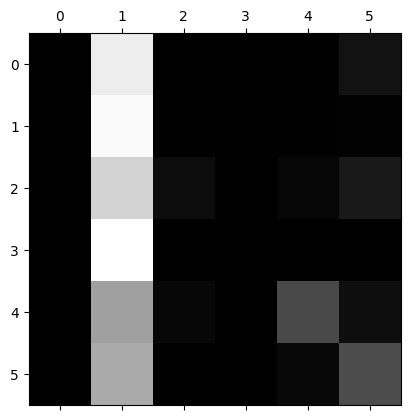

In [178]:
plt.matshow(cm, cmap=mpl.cm.gray)

# RF bin

On essaie maintenant en ne différenciant que les `Essouché` et le reste.

In [179]:
import pandas as pd
import numpy as np

# import du csv
data = pd.read_csv('csv_correction.csv')

In [180]:
from sklearn import preprocessing, feature_selection

In [181]:
data['fk_arb_etat_bool'] = data['fk_arb_etat'].replace(['ABATTU', 'EN PLACE', 'Non essouché', 'REMPLACÉ','SUPPRIMÉ'],'non essouché')

In [182]:
data

,longitude,latitude,clc_quartier,clc_secteur,haut_tot,haut_tronc,tronc_diam,fk_arb_etat,fk_stadedev,fk_port,...,fk_situation,fk_revetement,age_estim,fk_prec_estim,clc_nbr_diag,fk_nomtech,villeca,feuillage,remarquable,fk_arb_etat_bool
0,3.293264,49.840500,Quartier du Centre-Ville,Quai Gayant,6.0,2.0,37.0,EN PLACE,Jeune,semi libre,...,Alignement,Non,15.0,5.0,0.0,QUERUB,VILLE,Feuillu,Non,non essouché
1,3.273380,49.861409,Quartier du Vermandois,Stade Cepy,13.0,1.0,160.0,EN PLACE,Adulte,semi libre,...,Groupe,Non,50.0,10.0,0.0,PINNIGnig,VILLE,Conifère,Non,non essouché
2,3.289068,49.844513,Quartier du Centre-Ville,Rue Villebois Mareuil,12.0,3.0,116.0,REMPLACÉ,Adulte,semi libre,...,Alignement,Non,30.0,10.0,0.0,ACEPSE,VILLE,Feuillu,Non,non essouché
3,3.302387,49.861778,Quartier de l'Europe,Square des Marronniers,16.0,3.0,150.0,EN PLACE,Adulte,semi libre,...,Groupe,Non,50.0,2.0,0.0,ACEPLA,VILLE,Feuillu,Non,non essouché
4,3.304047,49.858446,Quartier de l'Europe,Avenue Buffon,5.0,2.0,170.0,Essouché,Adulte,réduit,...,Isolé,Non,40.0,2.0,0.0,SALBAB,VILLE,Feuillu,Non,Essouché
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,3.283505,49.848695,Quartier du Centre-Ville,Place Edouard Branly,3.0,2.0,15.0,EN PLACE,Jeune,Libre,...,Isolé,Non,5.0,1.0,0.0,ALBJUL,VILLE,Feuillu,Non,non essouché
7405,3.283436,49.848682,Quartier du Centre-Ville,Place Edouard Branly,3.0,2.0,15.0,EN PLACE,Jeune,Libre,...,Isolé,Non,3.0,1.0,0.0,ALBJULcho,VILLE,Feuillu,Non,non essouché
7406,3.297078,49.860413,Quartier de l'Europe,rue Hertz,3.0,2.0,15.0,EN PLACE,Jeune,Libre,...,Isolé,Non,5.0,1.0,0.0,CEDLIB,VILLE,Conifère,Non,non essouché
7407,3.291685,49.848009,Quartier du Centre-Ville,Square rue Fréreuse,3.0,2.0,15.0,EN PLACE,Jeune,Libre,...,Alignement,Non,5.0,1.0,0.0,FAGSYLdawgol,VILLE,Feuillu,Non,non essouché


In [183]:
list_col = ['fk_stadedev', 'fk_arb_etat', 'fk_arb_etat_bool']
for col in list_col:
  encoder = preprocessing.OrdinalEncoder()
  fk_stadedev_encoded = encoder.fit_transform(data[[col]])
  print(encoder.categories_)
  data[col] = fk_stadedev_encoded

[array(['Adulte', 'Jeune', 'senescent', 'vieux'], dtype=object)]
[array(['ABATTU', 'EN PLACE', 'Essouché', 'Non essouché', 'REMPLACÉ',
       'SUPPRIMÉ'], dtype=object)]
[array(['Essouché', 'non essouché'], dtype=object)]


In [184]:
X_train, X_test, y_train, y_test = train_test_split(data[["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', 'age_estim']], data["fk_arb_etat_bool"], test_size=0.2, random_state=42)

In [185]:
from sklearn.ensemble import RandomForestClassifier
import time

In [186]:
start_time = time.time()
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier = classifier.fit(X_train, y_train)
end_time = time.time()

In [187]:
print(f'Temps écoulé : {end_time - start_time :.3f} secondes.')

Temps écoulé : 0.521 secondes.


In [188]:
from sklearn.metrics import accuracy_score

In [189]:
y_test_predicted = classifier.predict(X_test)
accuracy_score(y_test, y_test_predicted)

0.975033738191633

In [190]:
cm = confusion_matrix(y_test, y_test_predicted, normalize="true")
cm

array([[0.04      , 0.96      ],
       [0.00892244, 0.99107756]])

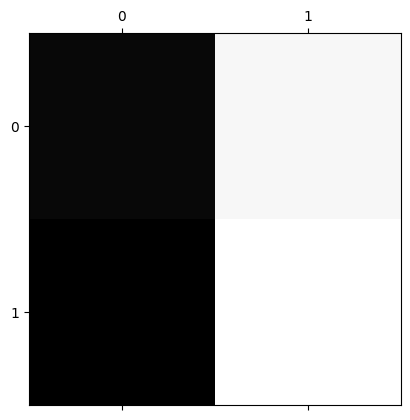

In [191]:
plt.matshow(cm, cmap=mpl.cm.gray)

# RF avec binaire et feature selection

https://www.geeksforgeeks.org/feature-selection-using-random-forest/

In [192]:
list_col = ['fk_stadedev', 'fk_arb_etat', 'fk_arb_etat_bool', 'clc_quartier', 'clc_secteur', 'feuillage', 'fk_port', 'fk_situation', 'fk_nomtech']
for col in list_col:
  encoder = preprocessing.OrdinalEncoder()
  fk_stadedev_encoded = encoder.fit_transform(data[[col]])
  print(encoder.categories_)
  data[col] = fk_stadedev_encoded


[array([0., 1., 2., 3.])]
[array([0., 1., 2., 3., 4., 5.])]
[array([0., 1.])]
[array(['HARLY', 'OMISSY', 'Quartier Remicourt', 'Quartier Saint-Jean',
       'Quartier Saint-Martin - Oëstres', 'Quartier de Neuville',
       "Quartier de l'Europe", 'Quartier du Centre-Ville',
       'Quartier du Vermandois', "Quartier du faubourg d'Isle", 'ROUVROY'],
      dtype=object)]
[array(['Accueil de loisirs Kergomard', 'Ancienne ecole David et Maigret',
       'Auberge de jeunesse', 'Avenue Aristide Briand', 'Avenue Buffon',
       'Avenue Charles Feuillette', 'Avenue Faidherbe',
       'Avenue Léo Lagrange', 'Avenue Pierre Chocquart',
       'Avenue Pierre Choquart', 'Avenue Robert Schuman',
       'Avenue de la Paix', 'Avenue de la République',
       'Avenue de la Résistance',
       'Avenue des Fusillés de Fontaine Notre Dame',
       'Avenue du Cimetière de La Tombelle',
       'Avenue du Général de Gaulle', 'Banque alimentaire',
       'Bibliothèque Guy de Maupassant', 'Boulevard Cordier',


In [193]:
data

,longitude,latitude,clc_quartier,clc_secteur,haut_tot,haut_tronc,tronc_diam,fk_arb_etat,fk_stadedev,fk_port,...,fk_situation,fk_revetement,age_estim,fk_prec_estim,clc_nbr_diag,fk_nomtech,villeca,feuillage,remarquable,fk_arb_etat_bool
0,3.293264,49.840500,7.0,112.0,6.0,2.0,37.0,1.0,1.0,8.0,...,0.0,Non,15.0,5.0,0.0,185.0,VILLE,1.0,Non,1.0
1,3.273380,49.861409,8.0,228.0,13.0,1.0,160.0,1.0,0.0,8.0,...,1.0,Non,50.0,10.0,0.0,129.0,VILLE,0.0,Non,1.0
2,3.289068,49.844513,7.0,166.0,12.0,3.0,116.0,4.0,0.0,8.0,...,0.0,Non,30.0,10.0,0.0,20.0,VILLE,1.0,Non,1.0
3,3.302387,49.861778,6.0,225.0,16.0,3.0,150.0,1.0,0.0,8.0,...,1.0,Non,50.0,2.0,0.0,15.0,VILLE,1.0,Non,1.0
4,3.304047,49.858446,6.0,4.0,5.0,2.0,170.0,2.0,0.0,6.0,...,2.0,Non,40.0,2.0,0.0,192.0,VILLE,1.0,Non,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,3.283505,49.848695,7.0,103.0,3.0,2.0,15.0,1.0,1.0,1.0,...,2.0,Non,5.0,1.0,0.0,30.0,VILLE,1.0,Non,1.0
7405,3.283436,49.848682,7.0,103.0,3.0,2.0,15.0,1.0,1.0,1.0,...,2.0,Non,3.0,1.0,0.0,31.0,VILLE,1.0,Non,1.0
7406,3.297078,49.860413,6.0,238.0,3.0,2.0,15.0,1.0,1.0,1.0,...,2.0,Non,5.0,1.0,0.0,50.0,VILLE,0.0,Non,1.0
7407,3.291685,49.848009,7.0,226.0,3.0,2.0,15.0,1.0,1.0,1.0,...,0.0,Non,5.0,1.0,0.0,70.0,VILLE,1.0,Non,1.0


In [194]:
from sklearn.model_selection import train_test_split

In [195]:
all_cols_list = ["haut_tot", 'haut_tronc', 'tronc_diam', 'fk_stadedev', 'age_estim', 'clc_quartier', 'clc_secteur', 'feuillage', 'fk_port', 'fk_situation', 'fk_nomtech']

In [196]:
X_train, X_test, y_train, y_test = train_test_split(data[all_cols_list], data["fk_arb_etat_bool"], test_size=0.2, random_state=42)

In [197]:
# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)

In [198]:
accuracy_before

0.979757085020243

In [199]:
cm = confusion_matrix(y_test, rf.predict(X_test))

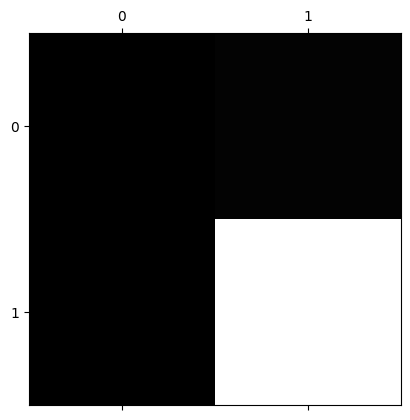

In [200]:
plt.matshow(cm, cmap=mpl.cm.gray)

In [201]:
# Extract feature importances
importances = rf.feature_importances_
importances

array([0.15161135, 0.112041  , 0.26843113, 0.01349043, 0.07359512,
       0.06056892, 0.1296089 , 0.01190648, 0.02460533, 0.03037062,
       0.12377071])

In [202]:
feature_names = data[all_cols_list].columns
feature_names

Index(['haut_tot', 'haut_tronc', 'tronc_diam', 'fk_stadedev', 'age_estim',
       'clc_quartier', 'clc_secteur', 'feuillage', 'fk_port', 'fk_situation',
       'fk_nomtech'],
      dtype='object')

In [203]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,haut_tot,0.151611
1,haut_tronc,0.112041
2,tronc_diam,0.268431
3,fk_stadedev,0.013490
4,age_estim,0.073595
5,clc_quartier,0.060569
6,clc_secteur,0.129609
7,feuillage,0.011906
8,fk_port,0.024605
9,fk_situation,0.030371


In [204]:
# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

         Feature  Importance
2     tronc_diam    0.268431
0       haut_tot    0.151611
6    clc_secteur    0.129609
10    fk_nomtech    0.123771
1     haut_tronc    0.112041
4      age_estim    0.073595
5   clc_quartier    0.060569
9   fk_situation    0.030371
8        fk_port    0.024605
3    fk_stadedev    0.013490
7      feuillage    0.011906


In [205]:
# Select top N features (example selecting top 5 features)
top_features = feature_importance_df['Feature'][:5].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [206]:
# Train the Random Forest model with selected features
start_time = time.time()
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_selected.fit(X_train_selected, y_train)
end_time = time.time()
y_test_predicted = rf_selected.predict(X_test_selected)
# Evaluate the model
#accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_score(y_test, y_test_predicted):.3f}')

print(f'Temps écoulé : {end_time - start_time :.3f} secondes.')
cm = confusion_matrix(y_test, y_test_predicted, normalize="true")
cm

Accuracy after feature selection: 0.979
Temps écoulé : 0.261 secondes.


array([[0.04      , 0.96      ],
       [0.00480439, 0.99519561]])

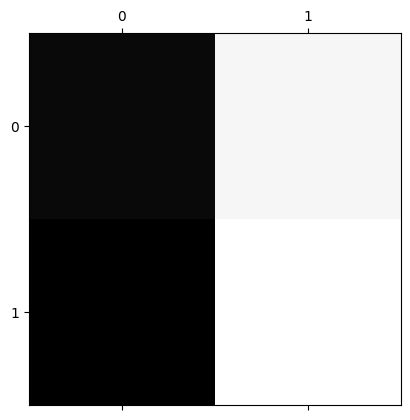

In [207]:
plt.matshow(cm, cmap=mpl.cm.gray)

## RF + bool + feature selection + grid search

In [208]:
classifier = RandomForestClassifier(random_state=42)
params = {"n_estimators": [50, 100, 150, 200, 250, 300]}
gscv = GridSearchCV(estimator=classifier, param_grid=params, scoring="accuracy", cv=5, n_jobs=-1)
classifier_with_grid_search = gscv.fit(X_train_selected, y_train)  # le meilleur modele

print(classifier_with_grid_search.best_params_)
from sklearn.metrics import accuracy_score

y_test_predicted = classifier_with_grid_search.predict(X_test_selected)
accuracy_score(y_test, y_test_predicted)

{'n_estimators': 150}


0.9790823211875843

In [209]:
y_test

7092    1.0
1544    1.0
2431    1.0
3866    1.0
2549    1.0
       ... 
1488    1.0
1593    1.0
4139    1.0
6203    1.0
4393    1.0
Name: fk_arb_etat_bool, Length: 1482, dtype: float64

In [210]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

In [211]:
cvs = cross_val_predict(gscv, X_train_selected, y_train, cv = 3, n_jobs=-1)

In [212]:
cm = confusion_matrix(y_train, cvs, normalize="true")
cm

array([[0.11428571, 0.88571429],
       [0.00276482, 0.99723518]])

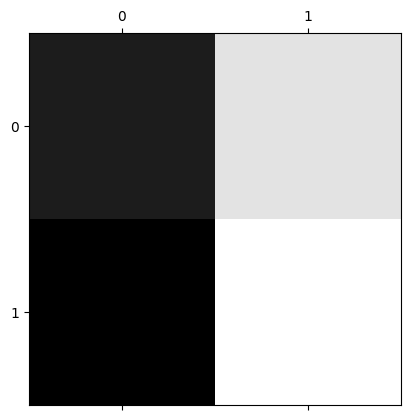

In [213]:
plt.matshow(cm, cmap=mpl.cm.gray)

Probleme : déséquilibre essouché / non essouché
Solution : 
## SMOTE

In [214]:
from imblearn.over_sampling import SMOTE

In [215]:
X_train

,haut_tot,haut_tronc,tronc_diam,fk_stadedev,age_estim,clc_quartier,clc_secteur,feuillage,fk_port,fk_situation,fk_nomtech
5628,13.0,2.0,110.0,0.0,35.0,9.0,90.0,1.0,8.0,0.0,20.0
5246,13.0,2.0,115.0,0.0,40.0,3.0,34.0,1.0,8.0,2.0,94.0
1049,16.0,5.0,113.0,0.0,50.0,2.0,82.0,1.0,8.0,0.0,132.0
626,14.0,2.0,165.0,0.0,50.0,6.0,10.0,1.0,8.0,0.0,45.0
2018,8.0,3.0,80.0,0.0,40.0,9.0,14.0,1.0,7.0,0.0,169.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,31.0,4.0,211.0,0.0,40.0,6.0,69.0,1.0,8.0,1.0,137.0
5226,19.0,2.0,124.0,0.0,40.0,6.0,69.0,1.0,8.0,1.0,134.0
5390,9.0,2.0,90.0,1.0,20.0,8.0,116.0,1.0,8.0,0.0,210.0
860,9.0,3.0,79.0,0.0,50.0,2.0,91.0,1.0,8.0,1.0,38.0


In [216]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [217]:
X_train_sm

,haut_tot,haut_tronc,tronc_diam,fk_stadedev,age_estim,clc_quartier,clc_secteur,feuillage,fk_port,fk_situation,fk_nomtech
0,13.000000,2.000000,110.000000,0.0,35.000000,9.000000,90.000000,1.000000,8.0,0.000000,20.000000
1,13.000000,2.000000,115.000000,0.0,40.000000,3.000000,34.000000,1.000000,8.0,2.000000,94.000000
2,16.000000,5.000000,113.000000,0.0,50.000000,2.000000,82.000000,1.000000,8.0,0.000000,132.000000
3,14.000000,2.000000,165.000000,0.0,50.000000,6.000000,10.000000,1.000000,8.0,0.000000,45.000000
4,8.000000,3.000000,80.000000,0.0,40.000000,9.000000,14.000000,1.000000,7.0,0.000000,169.000000
...,...,...,...,...,...,...,...,...,...,...,...
11569,12.323611,3.323611,116.909737,0.0,39.854158,5.029168,175.827748,1.000000,8.0,1.000000,25.824990
11570,21.028460,5.014230,174.928851,0.0,39.857702,3.957310,229.056919,1.000000,8.0,0.985770,135.971540
11571,21.424724,3.000000,117.318543,0.0,50.000000,4.765453,185.827263,1.000000,8.0,0.000000,159.792384
11572,11.379579,2.689789,132.755264,0.0,39.653159,5.379579,146.901788,1.000000,8.0,0.689789,18.448947


In [218]:
y_train_sm

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11569    0.0
11570    0.0
11571    0.0
11572    0.0
11573    0.0
Name: fk_arb_etat_bool, Length: 11574, dtype: float64

# Suite book 2